## Ομάδα #75 
## Νικόλαος Μανιάτης - Φίλιππος Μαυρεπής

##### Datasets: S12,	B04,	119

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns

**Dataset Abstract**
NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.

**Attribute Information:**

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [2]:
features = ['freq','angle','length','velocity','thickness','pressure']
df = pd.read_table('./datasets/airfoil_self_noise.dat',names = features )
print(df.shape)
df.head()

(1503, 6)


,freq,angle,length,velocity,thickness,pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
df.isna().sum()

freq         0
angle        0
length       0
velocity     0
thickness    0
pressure     0
dtype: int64

In [4]:
df.corr()

,freq,angle,length,velocity,thickness,pressure
freq,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
pressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [5]:
df.columns

Index(['freq', 'angle', 'length', 'velocity', 'thickness', 'pressure'], dtype='object')

### Train-Test-Split our Dataset

In [7]:
X = df.copy()
X = X.drop(['pressure'],axis=1)
y = df[['pressure']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)
print('X train shape:',X_train.shape)
print('X test shape:',X_test.shape)
print('y train shape:',y_train.shape)
print('y test shape:',y_test.shape)

X train shape: (1052, 5)
X test shape: (451, 5)
y train shape: (1052, 1)
y test shape: (451, 1)


**Θα ξεκινήσουμε με δύο απλούς Regressors, τον Ordinary Least Squares και τον Polynomial Regressor. Αυτοί δεν επιδέχονται κάποιου είδους optimization (εκτός από την τάξη του πολυωνύμου) οπότε τους παρουσιάζουμε στην αρχή, πριν συνεχίσουμε με πιο πολύπλοκους αλγόριθμους.**

## Ordinary Least Squares

In [11]:
reg = LinearRegression().fit(X_train, y_train)

In [12]:
reg.score(X_test, y_test)

0.48701529018157896

## Polynomial Regression

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [103]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[1.00000000e+00, 8.00000000e+02, 0.00000000e+00, ...,
        5.08369000e+03, 1.89898281e-01, 7.09353976e-06],
       [1.00000000e+00, 1.00000000e+03, 0.00000000e+00, ...,
        5.08369000e+03, 1.89898281e-01, 7.09353976e-06],
       [1.00000000e+00, 1.25000000e+03, 0.00000000e+00, ...,
        5.08369000e+03, 1.89898281e-01, 7.09353976e-06],
       ...,
       [1.00000000e+00, 4.00000000e+03, 1.56000000e+01, ...,
        1.56816000e+03, 2.09280852e+00, 2.79298509e-03],
       [1.00000000e+00, 5.00000000e+03, 1.56000000e+01, ...,
        1.56816000e+03, 2.09280852e+00, 2.79298509e-03],
       [1.00000000e+00, 6.30000000e+03, 1.56000000e+01, ...,
        1.56816000e+03, 2.09280852e+00, 2.79298509e-03]])

In [104]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
...                   ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
model = model.fit(X_train,y_train)
model.named_steps['linear'].coef_
model.score(X_test, y_test)

0.6223336446282257

degree of polynomial = 1 and score is 0.48701529018065426
degree of polynomial = 2 and score is 0.6223336446282257
degree of polynomial = 3 and score is 0.7209720262016102


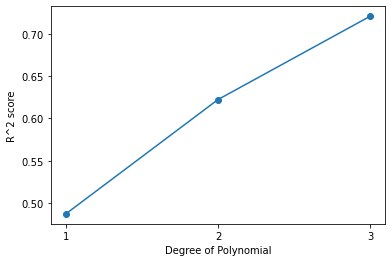

In [134]:
scores = []
ais = []
for i in range(1,4):
    model = Pipeline([('poly', PolynomialFeatures(degree=i)),
    ('linear', LinearRegression(fit_intercept=False))])
    # fit to an order-3 polynomial data
    model = model.fit(X_train,y_train)
    model.named_steps['linear'].coef_
    print('degree of polynomial = {} and score is {}'.format(i,model.score(X_test, y_test)))
    scores.append(model.score(X_test,y_test))
    ais.append(i)
plt.plot(ais,scores)
plt.scatter(ais,scores)
plt.ylabel('R^2 score')
plt.xlabel('Degree of Polynomial')
plt.xticks([1,2,3])
plt.yticks()
plt.show()

# Main Problem

In [15]:
features = ['freq','angle','length','velocity','thickness','pressure']
df = pd.read_table('./datasets/airfoil_self_noise.dat',names = features )
print(df.shape)
df.head()

(1503, 6)


,freq,angle,length,velocity,thickness,pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [9]:
X = df.copy()
X = X.drop(['pressure'],axis=1)
y = df[['pressure']]

In [10]:
from sklearn import preprocessing
scaler_x = preprocessing.MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
scaler_y = preprocessing.MinMaxScaler()
y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1,1))
y_scaled = y_scaled.reshape(-1)
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y_scaled, random_state=1)
# val_y = scaler_y.inverse_transform(np.array(val_y).reshape(-1,1))

In [11]:
models = []
models.append(('LR', LinearRegression()))
models.append(('RD', Ridge()))
models.append(('LAS', Lasso()))
models.append(('DT', DecisionTreeRegressor(random_state=75)))
models.append(('MLP', MLPRegressor(random_state=75)))#Default Hidden Layers
models.append(('DMLP', MLPRegressor(random_state=75, hidden_layer_sizes=(100,100))))#With 1 extra hidden layer, default is (100,). (Deep Multi Layer Perceptron).
models.append(('SVR',SVR()))
models.append(('ET',ExtraTreesRegressor(random_state=75)))
models.append(('XGB', XGBRegressor(random_state=75)))

In [137]:
def compare_models(trainX,trainY,testX,testY,models):
    print('\nCompare Multiple Classifiers:')
    print('\nK-Fold Cross-Validation Accuracy:\n')
    
    names = []
    tempdf = pd.DataFrame(columns=['Name','Dataset','Score','St.Dev'])
    for name, model in models:
        model.fit(trainX,trainY)
        kfold = KFold(n_splits=2,shuffle=True,random_state = 75)
        train_accuracy_results = cross_val_score(model, trainX,trainY, cv=kfold)
        test_accuracy_results = cross_val_score(model,testX,testY,cv=kfold)
        tempdf = tempdf.append({'Name':name,'Dataset':'Train','Score':train_accuracy_results.mean(),
                               'St.Dev':train_accuracy_results.std()},ignore_index=True)
        tempdf = tempdf.append({'Name':name,'Dataset':'Test','Score':test_accuracy_results.mean(),
                               'St.Dev':test_accuracy_results.std()},ignore_index=True)
    g = sns.catplot(x = 'Name', y='Score',hue = 'Dataset',data=tempdf, kind='bar')
    g.set_xticklabels(rotation=30)
    return tempdf,plt.show()


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:



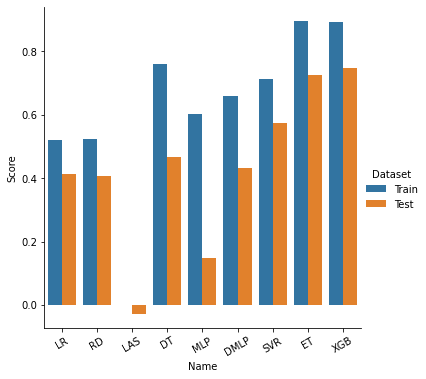

In [151]:
models_df,_ = compare_models(train_X, train_y, test_X, test_y, models)

About LASSO:
It's not impossible to get an R^2 value less than 0.
R^2 is a metric used to measure the performance of a regressor. The optimal score of R^2 metric is 1. If any regressor predicts a constant value, you should expect an R^2 score of 0 for that regressor. **But unexpectedly, you can get worse performance than that.**

## Optimization for each regressor individually

In [14]:
models_opt = []

#### 1. Linear Regression: Has to hyperparameters to optimize.

In [15]:
LR = LinearRegression()
models_opt.append(('LD*',LR))

#### 2. Ridge Regression

In [24]:
%%time
Ridge_ = GridSearchCV(Ridge(), param_grid = {'alpha':[i for i in np.arange(0,1,0.05)],\
                                                'solver':('svd', 'cholesky', 'lsqr')},cv=KFold(n_splits=2,shuffle=True,random_state = 75))
Ridge_.fit(train_X,train_y)

Wall time: 243 ms


GridSearchCV(cv=KFold(n_splits=2, random_state=75, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0, 0.05, 0.1, 0.15000000000000002, 0.2,
                                   0.25, 0.30000000000000004,
                                   0.35000000000000003, 0.4, 0.45, 0.5, 0.55,
                                   0.6000000000000001, 0.65, 0.7000000000000001,
                                   0.75, 0.8, 0.8500000000000001, 0.9,
                                   0.9500000000000001],
                         'solver': ('svd', 'cholesky', 'lsqr')})

In [25]:
Ridge_.best_estimator_

Ridge(alpha=0.55, solver='lsqr')

In [16]:
Ridge_opt = Ridge(alpha=0.55, solver = 'lsqr')
Ridge_opt.fit(train_X,train_y)

Ridge(alpha=0.55, solver='lsqr')

In [17]:
models_opt.append(('RD*',Ridge_opt))

#### 3. Lasso Regression

In [90]:
%%time
Lasso_ = GridSearchCV(Lasso(), param_grid = {'alpha':[0.0001, 0.0002,0.001,0.01,0.1,0.2,0.5,0.8,1],\
                                            'max_iter':[k for k in np.arange(1000,10000,500)],
                                            'tol':[1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]},cv=KFold(n_splits=2,shuffle=True,random_state = 75))
Lasso_.fit(train_X,train_y)

Wall time: 2.7 s


GridSearchCV(cv=KFold(n_splits=2, random_state=75, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2, 0.5,
                                   0.8, 1],
                         'max_iter': [1000, 1500, 2000, 2500, 3000, 3500, 4000,
                                      4500, 5000, 5500, 6000, 6500, 7000, 7500,
                                      8000, 8500, 9000, 9500],
                         'tol': [0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07,
                                 1e-08]})

In [91]:
Lasso_.best_estimator_

Lasso(alpha=0.0002, tol=0.01)

In [18]:
Lasso_opt = Lasso(alpha=0.0002,tol=0.01)
Lasso_opt.fit(train_X,train_y)

Lasso(alpha=0.0002, tol=0.01)

In [19]:
models_opt.append(('LAS*',Lasso_opt))

Παρατηρούμε ότι στις περιπτώσεις Ridge&Lasso Regression το γεγονός ότι $\alpha\rightarrow 0$, σημαίνει ότι το πρόβλημά μας τείνει σε αυτό της απλής γραμμικής παλινδρόμησης επομένως παίρνουμε τους ίδιους συντελεστές με αυτό, γιαυτό και οι 2 τιμές του $R^2$ συγκλίνουν προς αυτό της γραμμικής παλινδρόμησης.

#### 4. Decision Trees Regressor

In [31]:
%%time
DT_ = GridSearchCV(DecisionTreeRegressor(), param_grid = {'criterion': ['mse', 'mae'],
                                                          'max_depth': [None,1,2,3,4,5,6,7,8,9,10],
                                                         "min_samples_split":range(2,10),
                                                         "min_samples_leaf":range(1,5)}
                                                          ,n_jobs = -1,cv=KFold(n_splits=2,shuffle=True,random_state = 75))
DT_.fit(train_X, train_y)

Wall time: 3.32 s


GridSearchCV(cv=KFold(n_splits=2, random_state=75, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)})

In [32]:
DT_.best_estimator_

DecisionTreeRegressor(criterion='mae', min_samples_split=3)

In [20]:
DT_opt = DecisionTreeRegressor(criterion='mae')
DT_opt.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mae')

In [21]:
models_opt.append(('DT*',DT_opt))

**Σημείωση: καθαρίζουμε τις φακές και τις ξεπλε.........οκ εδώ απλά κάνει overfitting.**

**5(a). Multi Layer Perceptron Regressor (no-hidden layers)**

In [75]:
%%time
MLP_ = GridSearchCV(MLPRegressor(random_state=75), param_grid={'activation' : ['tanh','relu'],
                                                'solver':['sgd','adam'],
                                                'alpha':[1e-5,1e-4,1e-3],
                                                'learning_rate':['constant','adaptive'],
                                                'max_iter':[100,200,1000],
                                                'learning_rate_init':[0.0001,0.001,0.003,0.005,0.01]},
                                                 n_jobs = -1,cv=KFold(n_splits=2,shuffle=True,random_state = 75))
MLP_.fit(train_X,train_y)

Wall time: 33.9 s


GridSearchCV(cv=KFold(n_splits=2, random_state=75, shuffle=True),
             estimator=MLPRegressor(random_state=75), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [1e-05, 0.0001, 0.001],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.0001, 0.001, 0.003, 0.005,
                                                0.01],
                         'max_iter': [100, 200, 1000],
                         'solver': ['sgd', 'adam']})

In [99]:
MLP_.best_estimator_

MLPRegressor(learning_rate_init=0.01, max_iter=100, random_state=75)

In [22]:
MLP_opt = MLPRegressor(random_state=75, max_iter=100,learning_rate_init=0.01)
MLP_opt.fit(train_X,train_y)#, alpha=1e-02, learning_rate_init=0.003, max_iter=100

MLPRegressor(learning_rate_init=0.01, max_iter=100, random_state=75)

In [23]:
models_opt.append(('MLP*',MLP_opt))

**5(b). Multi Layer Perceptron (with hidden layers)**

Εδώ κρατάμε τις βέλτιστες υπερπαραμέτρους που βρέθηκαν από το παραπάνω Grid Search και τις χρησιμοποιούμε για να κάνουμε κι'άλλο Grid Search, αυτή τη φορά μαζί με hidden layers.

In [102]:
%%time
MLP_2 = GridSearchCV(MLPRegressor(random_state=75), 
                                 param_grid={'max_iter':[100,200,1000],'learning_rate_init':[0.0001,0.001,0.005],
                                'hidden_layer_sizes':[(256, 256, 256),(512,256,128),(64,32,8)]},n_jobs = -1,
                                    cv=KFold(n_splits=2,shuffle=True,random_state = 75))
MLP_2.fit(train_X,train_y)

Wall time: 34.4 s


GridSearchCV(cv=KFold(n_splits=2, random_state=75, shuffle=True),
             estimator=MLPRegressor(random_state=75), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(256, 256, 256),
                                                (512, 256, 128), (64, 32, 8)],
                         'learning_rate_init': [0.0001, 0.001, 0.005],
                         'max_iter': [100, 200, 1000]})

Υπενθύμιση μην το ξεχάσουμε: Το hidden_layer_size = (256, 256, 256) έβγαλε το καλύτερο score, ~86.7 \%.

In [103]:
MLP_2.best_estimator_

MLPRegressor(hidden_layer_sizes=(512, 256, 128), learning_rate_init=0.005,
             max_iter=100, random_state=75)

In [24]:
MLP_2_opt = MLPRegressor(hidden_layer_sizes=(512, 256, 128), learning_rate_init=0.005,
             max_iter=100, random_state=75)
MLP_2_opt.fit(train_X,train_y)

MLPRegressor(hidden_layer_sizes=(512, 256, 128), learning_rate_init=0.005,
             max_iter=100, random_state=75)

In [25]:
models_opt.append(('MLP2*',MLP_2_opt))

**6. Support Vector Regression** 

In [35]:
%%time
param = {'kernel' : ('poly', 'rbf','sigmoid'),'C' : [1,5],'degree' : [3,8],'coef0' : [0.01,0.001],'gamma' : ['scale','auto']}
#defaults: kernel=rbf, C=1.0, degree=3, coef0=0.0, gamma=scale
SVR_ = GridSearchCV(SVR(),param_grid = param,cv = KFold(n_splits=2,shuffle=True,random_state = 75),n_jobs=-1,verbose=2)
SVR_.fit(train_X,train_y)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  73 out of  96 | elapsed:    0.2s remaining:    0.0s


Wall time: 9.65 s


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    9.5s finished


GridSearchCV(cv=KFold(n_splits=2, random_state=75, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 5], 'coef0': [0.01, 0.001], 'degree': [3, 8],
                         'gamma': ['scale', 'auto'],
                         'kernel': ('poly', 'rbf', 'sigmoid')},
             verbose=2)

In [36]:
SVR_.best_estimator_

SVR(C=5, coef0=0.01)

Τώρα ξέρουμε ότι ο καλύτερος kernel είναι ο RBF οπότε θα κάνουμε άλλο ένα GridSearch πιο ειδικό.

In [57]:
%%time
param = {'C' : [1,5,5.5,6,7,7.5,8],'degree' : [3,8],'coef0' : [10,5,1,0.5,0.1,0.05],'tol':[1e-2,1e-3,1e-4]}
#defaults: kernel=rbf, C=1.0, degree=3, coef0=0.0, gamma=scale
SVR_ = GridSearchCV(SVR(),param_grid = param,cv = KFold(n_splits=2,shuffle=True,random_state = 75),n_jobs=-1,verbose=2)
SVR_.fit(train_X,train_y)

Fitting 2 folds for each of 252 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Wall time: 1.11 s


[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=2, random_state=75, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 5, 5.5, 6, 7, 7.5, 8],
                         'coef0': [10, 5, 1, 0.5, 0.1, 0.05], 'degree': [3, 8],
                         'tol': [0.01, 0.001, 0.0001]},
             verbose=2)

In [59]:
SVR_.best_estimator_

SVR(C=7, coef0=10)

In [60]:
SVR_opt = SVR(C=5, coef0 = 10)
SVR_opt.fit(train_X,train_y)

SVR(C=5, coef0=10)

In [62]:
models_opt.append(('SVR*',SVR_opt))

**7. Extra Trees Regressor**

In [82]:
%%time
ET_ = GridSearchCV(ExtraTreesRegressor(random_state=75), param_grid = {'criterion': ['mse', 'mae'],
                                                          'max_depth': [None,1,2],
                                                         "min_samples_split":[1,2,3],
                                                         "min_samples_leaf":[1,2,3]},
                                                           cv=KFold(n_splits=10,shuffle=True,random_state = 75),n_jobs=-1,verbose=2)
ET_.fit(train_X, train_y)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 509 tasks      | elapsed:   21.7s


Wall time: 24.4 s


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   24.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=75, shuffle=True),
             estimator=ExtraTreesRegressor(random_state=75), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [None, 1, 2],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]},
             verbose=2)

In [83]:
ET_.best_estimator_

ExtraTreesRegressor(random_state=75)

Παρατηρούμε ότι ο Extra Trees Regressor προτιμάει τις default παραμέτρους του.

In [84]:
ET_opt = ExtraTreesRegressor(random_state=75)
ET_opt.fit(train_X,train_y)

ExtraTreesRegressor(random_state=75)

In [85]:
models_opt.append(('ET*',ET_opt))


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:



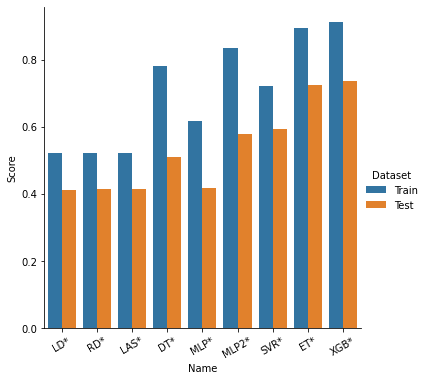

,Name,Dataset,Score,St.Dev
0,LD*,Train,0.522007,0.013868
1,LD*,Test,0.413464,0.005838
2,RD*,Train,0.522796,0.011365
3,RD*,Test,0.414904,0.017363
4,LAS*,Train,0.522140,0.013903
5,LAS*,Test,0.414883,0.009615
6,DT*,Train,0.782595,0.011329
7,DT*,Test,0.512020,0.041716
8,MLP*,Train,0.617452,0.004457
9,MLP*,Test,0.417174,0.014035


In [135]:
compare_models(train_X,train_y,test_X,test_y,models_opt)

**8. XG Boost Regressor**

Default hyperparameters:
booster = gbtree
min_child_weight = 1
gamma = 0
subsample = 1 
max_depth = 6
n_estimators = 

In [87]:
%%time
XGB_ = GridSearchCV(XGBRegressor(random_state=75,n_jobs=-1),
                                                            param_grid  = {'booster':['gbtree','dart'],
                                                            'min_child_weight':[1,5], 
                                                            'gamma':[0,1,2,3,4],  
                                                            'subsample':[0.5,1],
                                                            'max_depth': [5,6,7],
                                                             'n_estimators':[100,500,1000]},
                                                            cv=KFold(n_splits=2,shuffle=True,random_state = 75),n_jobs=-1,verbose=2)
XGB_.fit(train_X, train_y)

Fitting 2 folds for each of 360 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  4.4min finished


Wall time: 4min 24s


GridSearchCV(cv=KFold(n_splits=2, random_state=75, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monot...
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None, random_state=75,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_m

In [88]:
XGB_.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=75,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
XGB_opt = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1,monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=75,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

Αυτό το μοντέλο οδηγεί σε μικρή αύξηση απόδοσης στο train set και μικρή μείωση στο test set. Αυτό σημαίνει ότι κάνει Overfitting επομένως θα βάλω στο επόμενο Grid Search παραμέτρους alpha και lambda που είναι οι παράμετροι κανονικοποίησης L1 και L2 αντίστοιχα.

In [95]:
%%time
XGB_ = GridSearchCV(XGBRegressor(random_state=75,n_jobs=-1),
                                                            param_grid  = {'subsample':[0.2,0.3,0.4,0.5,0.6],
                                                            'max_depth': [3,4,5,6],
                                                            'reg_alpha':[0,0.1,0.5,1],
                                                             'reg_lambda':[1,1.5,3,5]},
                                                            cv=KFold(n_splits=2,shuffle=True,random_state = 75),n_jobs=-1,verbose=2)
XGB_.fit(train_X, train_y)

Fitting 2 folds for each of 320 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   17.7s finished


Wall time: 17.9 s


GridSearchCV(cv=KFold(n_splits=2, random_state=75, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None, random_state=75,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                        

In [96]:
XGB_.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=75,
             reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
XGB_opt = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=75,
             reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGB_opt.fit(train_X,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=75,
             reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
del models_opt[-1]
models_opt.append(('XGB*',XGB_opt))


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

     Name Dataset     Score    St.Dev
0     LD*   Train  0.522007  0.013868
1     LD*    Test  0.413464  0.005838
2     RD*   Train  0.522796  0.011365
3     RD*    Test  0.414904  0.017363
4    LAS*   Train  0.522140  0.013903
5    LAS*    Test  0.414883  0.009615
6     DT*   Train  0.792990  0.005335
7     DT*    Test  0.523244  0.038437
8    MLP*   Train  0.617452  0.004457
9    MLP*    Test  0.417174  0.014035
10  MLP2*   Train  0.835268  0.023792
11  MLP2*    Test  0.578987  0.004919
12   SVR*   Train  0.723088  0.014036
13   SVR*    Test  0.595058  0.002953
14    ET*   Train  0.894935  0.019385
15    ET*    Test  0.727067  0.026498
16   XGB*   Train  0.912759  0.003713
17   XGB*    Test  0.737950  0.022655


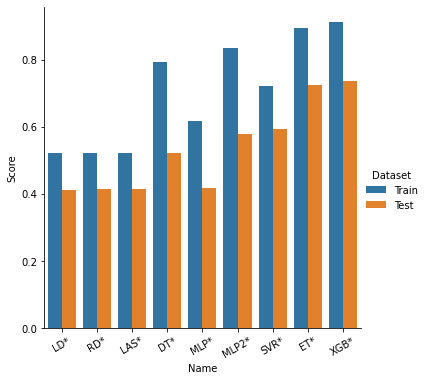

,Name,Dataset,Score,St.Dev
0,LD*,Train,0.522007,0.013868
1,LD*,Test,0.413464,0.005838
2,RD*,Train,0.522796,0.011365
3,RD*,Test,0.414904,0.017363
4,LAS*,Train,0.522140,0.013903
5,LAS*,Test,0.414883,0.009615
6,DT*,Train,0.792990,0.005335
7,DT*,Test,0.523244,0.038437
8,MLP*,Train,0.617452,0.004457
9,MLP*,Test,0.417174,0.014035


In [99]:
compare_models(train_X, train_y, test_X, test_y, models_opt)

In [171]:
def compare_models_final(trainX,trainY,testX,testY,models,modelsopt,tempdf):
    print('\nCompare Multiple Classifiers:')
    print('\nK-Fold Cross-Validation Accuracy:\n')
    
#     tempdf = pd.DataFrame(columns=['Name','Dataset','Score','St.Dev'])
    for model, modelopt in zip(models,modelsopt):
        modelopt[1].fit(trainX,trainY)
        kfold = KFold(n_splits=2,shuffle=True,random_state = 75)
        train_accuracy_results = cross_val_score(modelopt[1], trainX,trainY, cv=kfold)
        test_accuracy_results = cross_val_score(modelopt[1],testX,testY,cv=kfold)
        tempdf = tempdf.append({'Name':model[0],'Dataset':'Train-opt','Score':train_accuracy_results.mean(),
                               'St.Dev':train_accuracy_results.std()},ignore_index=True)
        tempdf = tempdf.append({'Name':model[0],'Dataset':'Test-opt','Score':test_accuracy_results.mean(),
                               'St.Dev':test_accuracy_results.std()},ignore_index=True)
    print(tempdf)
    sns.set(rc={'figure.figsize':(20,25)})
    g = sns.catplot(x = 'Name', y='Score',hue = 'Dataset',data=tempdf, kind='bar')
    g.set_xticklabels(rotation=30)
    plt.show()    
    return


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

    Name    Dataset         Score        St.Dev
0     LR      Train  5.220069e-01  1.386776e-02
1     LR       Test  4.134636e-01  5.838136e-03
2     RD      Train  5.223920e-01  9.644159e-03
3     RD       Test  4.058728e-01  2.520266e-02
4    LAS      Train -4.150551e-09  7.837497e-11
5    LAS       Test -2.704928e-02  4.787929e-03
6     DT      Train  7.602865e-01  4.976846e-03
7     DT       Test  4.679349e-01  8.720270e-02
8    MLP      Train  6.025453e-01  7.498945e-03
9    MLP       Test  1.481680e-01  1.235114e-01
10  DMLP      Train  6.602816e-01  2.710515e-04
11  DMLP       Test  4.332735e-01  5.049170e-02
12   SVR      Train  7.145073e-01  1.904287e-02
13   SVR       Test  5.754953e-01  3.654529e-04
14    ET      Train  8.949353e-01  1.938535e-02
15    ET       Test  7.270670e-01  2.649790e-02
16   XGB      Train  8.924899e-01  5.571336e-03
17   XGB       Test  7.490595e-01  2.314538e-02
18    LR  Train-opt  

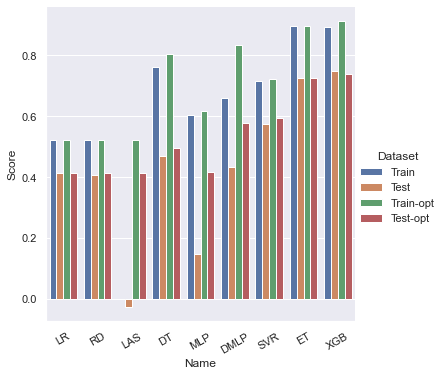

Wall time: 15.7 s


In [172]:
%%time
compare_models_final(train_X,train_y,test_X,test_y,models,models_opt,models_df)